In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import Thermobar as pt
import PySulfSat as ss
pd.set_option("display.max_columns", None)

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 9 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 10 # Overall title
plt.rcParams["axes.labelsize"] = 10 # Axes labels

In [3]:
Lerner=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Lerner2021_FilteredMI')
Lerner_Num=Lerner.apply(pd.to_numeric, errors='coerce').fillna(0)
Lerner_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx',sheet_name='Lerner2021_FilteredMG')

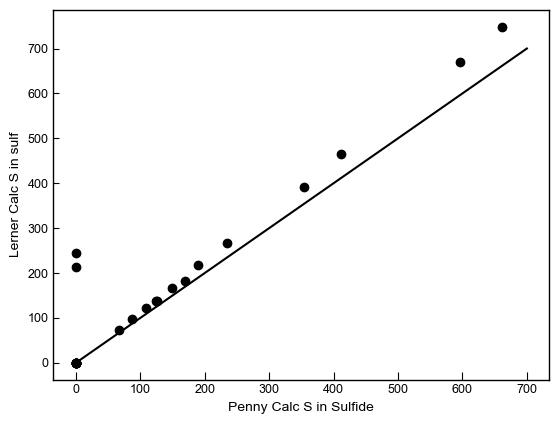

In [4]:
MI_Vol=((4/3)*math.pi*((Lerner_Num['Melt inclusion width']+Lerner_Num['Melt inclusion length'])/4)*0.5*Lerner_Num['Melt inclusion width']*0.5*Lerner_Num['Melt inclusion length'])
Sulf_Vol=(4/3)*math.pi*(0.5*Lerner_Num['Sulfide diameter if present in MI'])**3
Mass_Melt=MI_Vol*Lerner_Num['Melt density (1atm, Melt Temp, non-PEC-corrected composition; DensityX calcs)']
Mass_Sulf=Sulf_Vol*4.2
PPM_Sulf=330000*Mass_Sulf/Mass_Melt
plt.plot(PPM_Sulf, Lerner['S_Sulf'], 'ok')#.iloc[5]
plt.xlabel('Penny Calc S in Sulfide')
plt.ylabel('Lerner Calc S in sulf')
plt.plot([0, 700], [0, 700], '-k')

## Which ones have sulfides

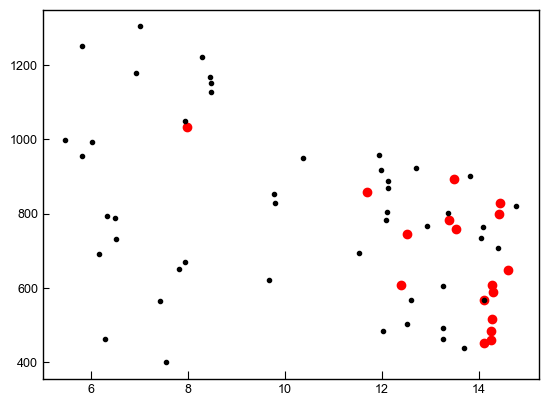

In [5]:
Has_Sulf=Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Lerner['S_Raw_Glass_Meas']
plt.plot(Lerner['MgO wt%_PEC'].loc[Has_Sulf], 
         Lerner['S_Raw_Glass_Meas'].loc[Has_Sulf], 'or' , label='Raw Glass - Meas Sulf')


plt.plot(Lerner['MgO wt%_PEC'].loc[~Has_Sulf], 
         Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf], '.k' , label='Raw Glass -No Meas Sulf')

## Wieser data

In [33]:
# Loading 2018 melt inclusion data
All2018_MI_preS=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Wieser_Ol_Hosted_MI_2018')
grad=130
inter=-415 # 170, grad 120 acts as cutoff for Se degassed on. 


## Calculating errorbars for S in sulfide for my samples

F8_MI_with_sulf=All2018_MI_preS.loc[All2018_MI_preS['S_Sulf']>0]
MC1_all, all_outputs=ss.propagate_s_in_sulfide(sample_ID=F8_MI_with_sulf['Comment'], N_dup=1000, S_Sulf=32,
            Vol=F8_MI_with_sulf['Vol_Prop_Sulf'],
sulf_dens=4350, melt_dens=1000*F8_MI_with_sulf['Density_g_per_cm3'],
error_type_melt_dens='Abs', error_dist_melt_dens='normal', error_melt_dens=1000*All2018_MI_preS['Uncertainty_g_per_cm3'],
error_S_Sulf=3, error_type_S_Sulf='Abs', error_dist_S_Sulf='uniform',
error_Vol=50, error_type_Vol='Perc', error_dist_Vol='normal',
error_sulf_dens=150, error_type_sulf_dens='Abs', error_dist_sulf_dens='uniform',                       
plot_figure=True, len_loop=1)
MC1_all.head()
MC1_all['Comment']=MC1_all['Filename']
All2018_MI=pd.merge(All2018_MI_preS, MC1_all, on='Comment')
All2018_MI.head()

working on sample number 0
working on sample number 20


,Comment,Sample number,EPMA data for glass phase of melt inclusions (Uncorrected for PEC) (------->),Na2O_MI EPMA,Al2O3_MI EPMA,P2O5_MI EPMA,CaO_MI EPMA,K2O_MI EPMA,TiO2_MI EPMA,SiO2_MI EPMA,MgO_MI EPMA,FeO_MI EPMA,MnO_MI EPMA,S_MI EPMA (ppm),Cl_MI EPMA (ppm),H2O_MI SIMS,CO2_MI (SIMS+ Raman),F_MI SIMS,EPMA data for glass phase of melt inclusions (Corrected for PEC) (------->),Amount PEC (%),Na2O_MI_PEC EPMA,Al2O3_MI_PEC EPMA,P2O5_MI_PEC EPMA,CaO_MI_PEC EPMA,K2O_MI_PEC EPMA,TiO2_MI_PEC EPMA,SiO2_MI_PEC EPMA,MgO_MI_PEC EPMA,FeO_MI_PEC EPMA,MnO_MI_PEC EPMA,S_MI_PEC EPMA,Cl_MI_PEC EPMA,Correction factor for PEC correction,Things use to calculate saturation pressure (PEC-corrected)--->,Label,SiO2,TiO2,Al2O3,FeO,Fe2O3,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Temp,SaturationP_bars_VESIcal,XH2O_fl_VESIcal,Mineral Data,MgO_Min EPMA,SiO2_Min EPMA,FeO_Min EPMA,Al2O3_Min EPMA,CaO_Min EPMA,MnO_Min EPMA,NiO_Min EPMA,TiO2_Min EPMA,Cr2O3_Min EPMA,Na2O_Min EPMA,K2O_Min EPMA,Total_Min EPMA,Mg# Min,LAICPMS Data----->,Laser Batch (year_DayofOct_batch),Spot size (um),Reduced to,Source file,DateTime,Date,Time,Duration(s),Total points,Selection type,Components,Ca43_CPS,Ca43_CPS_Int2SE,IntStdWv,IntStdWv_Int2SE,Li_ppm_m7 LAICPMS,Li_ppm_m7_Int2SE,Be_ppm_m9 LAICPMS,Be_ppm_m9_Int2SE,Na_ppm_m23 LAICPMS,Na_ppm_m23_Int2SE,K_ppm_m39 LAICPMS,K_ppm_m39_Int2SE,Sc_ppm_m45 LAICPMS,Sc_ppm_m45_Int2SE,Ti_ppm_m49 LAICPMS,Ti_ppm_m49_Int2SE,V_ppm_m51 LAICPMS,V_ppm_m51_Int2SE,Cr_ppm_m53 LAICPMS,Cr_ppm_m53_Int2SE,Mn_ppm_m55 LAICPMS,Mn_ppm_m55_Int2SE,Fe_ppm_m56 LAICPMS,Fe_ppm_m56_Int2SE,Co_ppm_m59 LAICPMS,Co_ppm_m59_Int2SE,Ni_ppm_m60 LAICPMS,Ni_ppm_m60_Int2SE,Cu_ppm_m65 LAICPMS,Cu_ppm_m65_Int2SE,Zn_ppm_m66 LAICPMS,Zn_ppm_m66_Int2SE,Ga_ppm_m71 LAICPMS,Ga_ppm_m71_Int2SE,Ge_ppm_m74 LAICPMS,Ge_ppm_m74_Int2SE,Rb_ppm_m85 LAICPMS,Rb_ppm_m85_Int2SE,Sr_ppm_m88 LAICPMS,Sr_ppm_m88_Int2SE,Y_ppm_m89 LAICPMS,Y_ppm_m89_Int2SE,Zr_ppm_m90 LAICPMS,Zr_ppm_m90_Int2SE,Nb_ppm_m93 LAICPMS,Nb_ppm_m93_Int2SE,Mo_ppm_m95 LAICPMS,Mo_ppm_m95_Int2SE,Cd_ppm_m111 LAICPMS,Cd_ppm_m111_Int2SE,In_ppm_m115 LAICPMS,In_ppm_m115_Int2SE,Sn_ppm_m118 LAICPMS,Sn_ppm_m118_Int2SE,Sb_ppm_m121 LAICPMS,Sb_ppm_m121_Int2SE,Cs_ppm_m133 LAICPMS,Cs_ppm_m133_Int2SE,Ba_ppm_m137 LAICPMS,Ba_ppm_m137_Int2SE,La_ppm_m139 LAICPMS,La_ppm_m139_Int2SE,Ce_ppm_m140 LAICPMS,Ce_ppm_m140_Int2SE,Pr_ppm_m141 LAICPMS,Pr_ppm_m141_Int2SE,Nd_ppm_m146 LAICPMS,Nd_ppm_m146_Int2SE,Sm_ppm_m147 LAICPMS,Sm_ppm_m147_Int2SE,Eu_ppm_m153 LAICPMS,Eu_ppm_m153_Int2SE,Gd_ppm_m157 LAICPMS,Gd_ppm_m157_Int2SE,Tb_ppm_m159 LAICPMS,Tb_ppm_m159_Int2SE,Dy_ppm_m163 LAICPMS,Dy_ppm_m163_Int2SE,Ho_ppm_m165 LAICPMS,Ho_ppm_m165_Int2SE,Er_ppm_m166 LAICPMS,Er_ppm_m166_Int2SE,Tm_ppm_m169 LAICPMS,Tm_ppm_m169_Int2SE,Yb_ppm_m172 LAICPMS,Yb_ppm_m172_Int2SE,Lu_ppm_m175 LAICPMS,Lu_ppm_m175_Int2SE,Hf_ppm_m177 LAICPMS,Hf_ppm_m177_Int2SE,Ta_ppm_m181 LAICPMS,Ta_ppm_m181_Int2SE,W_ppm_m182 LAICPMS,W_ppm_m182_Int2SE,Tl_ppm_m205 LAICPMS,Tl_ppm_m205_Int2SE,Pb_ppm_m208 LAICPMS,Pb_ppm_m208_Int2SE,Bi_ppm_m209 LAICPMS,Bi_ppm_m209_Int2SE,Th_ppm_m232 LAICPMS,Th_ppm_m232_Int2SE,U_ppm_m238 LAICPMS,U_ppm_m238_Int2SE,Vol_Prop_Sulf,Mass_Prop_Sulf,S_Sulf,"Is sulfide attached to bubble/spinel (e.g. larger error)…. 1 = yes, 0 = no",S_Sulf_upper,S_Sulf_Lower,SCSS_Hugh_Raw,SCSS_Hugh_PEC,LLMin_Cu,LLMin_Co,Se_96_ppm_m80,As_91_ppm_m75,Ni_Se_Meas,Unnamed: 194,Unnamed: 195,Density_g_per_cm3,Uncertainty_g_per_cm3,Unnamed: 198,Filename,std_S_eq_melt,med_S_eq_melt,mean_S_eq_melt,ind_s_eq_melt
0,LLE_LL4_19c,LL4,NaN,2.5039,13.8177,0.2835,10.4339,0.3933,2.5835,50.9619,5.9413,11.1705,0.2222,1149.074528,90,0.317053,237.664548,419.479636,NaN,4.16,2.435,13.435,0.276,10.170,0.382,2.512,51.117,7.526,11.434,0.239,1103.182151,86.405530,0.960061,NaN,LLE_LL4_19c,51.117,2.512,13.435,9.71890,1.905666,0.239,7.526,10.170,2.435,0.382,0.276,0.500000,0.022817,1165.2726,370.0,0.132469,NaN,41.93930,39.27305,18.17150,0.03355,0.22475,0.26455,0.24030,NaN,NaN,NaN,NaN,100.14700,0.804460,NaN,2019_30_Batch4,40.0,Ca,13,30/10/2019 (4) 14:41:43.08,30/10/

In [34]:


JustF8_MI=(All2018_MI['Sample number']=="LL4")|(All2018_MI['Sample number']=="LL7")|(All2018_MI['Sample number']=="LL8")
F8_MI=All2018_MI.loc[JustF8_MI]

LL4_MI=All2018_MI['Sample number']=="LL4"
LL7_MI=All2018_MI['Sample number']=="LL7"
LL8_MI=All2018_MI['Sample number']=="LL8"

# Loading 2018 matrix glass
All2018_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx',
            sheet_name="Wieser_MatrixGlass_2018")
JustF8_MG=(All2018_MG['Sample number']=="LL4")|(All2018_MG['Sample number']=="LL7")|(All2018_MG['Sample number']=="LL8")
F8_MG=All2018_MG.loc[JustF8_MG]



S_Degass_Lim=grad*F8_MI['FeO_MI EPMA']+inter
Degass=F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim
Undegass=(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)
Degassed_Wieser=F8_MI.loc[F8_MI['S_MI EPMA (ppm)']<S_Degass_Lim]
Undegassed_Wieser=F8_MI.loc[(F8_MI['S_MI EPMA (ppm)']>=S_Degass_Lim)]

Has_Sulf_Wieser=F8_MI['S_Sulf']>0

## Applying the same degassing filter for F8

In [35]:
FeO_Lin=np.linspace(6, 13, 50)

S_Degass_Lin=grad*FeO_Lin+inter
S_Degass_Lim=grad*Lerner['FeOT wt%_Raw']+inter
Degass=Lerner['S_Raw_Glass_Meas']<S_Degass_Lim
Undegass=(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)
Degassed_Lerner=Lerner.loc[Lerner['S_Raw_Glass_Meas']<S_Degass_Lim]
Undegassed_Lerner=Lerner.loc[(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)]

## Smoking gun figure for paper

In [36]:
## Degassing trend from Lerner, web plot digitizer
𝛿34S_degass=[0.8059701492537314,
0.6318407960199011,
0.3532338308457712,
0.12686567164179063,
-0.16915422885572173,
-0.5174129353233825,
-0.8482587064676617,
-1.23134328358209,
-1.6492537313432845,
-1.9975124378109457,
-2.3980099502487566,
-2.7985074626865676,
-3.2338308457711444]
S_degass=[963.1799163,
862.7615063,
737.2384937,
641.8410042,
566.5271967,
481.1715481,
415.8995816,
355.6485356,
300.41841,
255.2301255,
205.0209205,
174.8953975,
139.748954]

## Loading in Sides data

In [9]:
Sides_Glass=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Sides14_Glass')
Sides_MI_Uncorr=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Sides14_MI_Uncorr')
Sides_MI_Corr=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx',
                            sheet_name='Sides14_MI_Corr')

In [10]:
## Loading my Ulu data
# Loading previous data from Chalcohile paper
Ulu_MI=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_Ol_Hosted_MI_1969_1974")
Ulu_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name="Wieser_MG_1969_1794")
Ulu_MI=Ulu_MI.loc[Ulu_MI['PEC amount']<0]

In [11]:
## Applying degassing filter
S_Degass_Lim_Sides=grad*Sides_MI_Uncorr['FeO']+inter
Degass_Sides=Sides_MI_Uncorr['SO2']*5004.99<S_Degass_Lim_Sides

## Applying degassing filter
S_Degass_Lim_Ulu=grad*Ulu_MI['FeOt']+inter
Degass_Ulu=Ulu_MI['SO2']*5004.99<S_Degass_Lim_Ulu



Ulu_MI['S_PEC']=(Ulu_MI['SO2']*5004.99)/(1-Ulu_MI['PEC amount']/100)
Sides_MI_Corr['S_PEC']=(Sides_MI_Corr['SO2']*5004.99)


## Plot of major elements for HMM

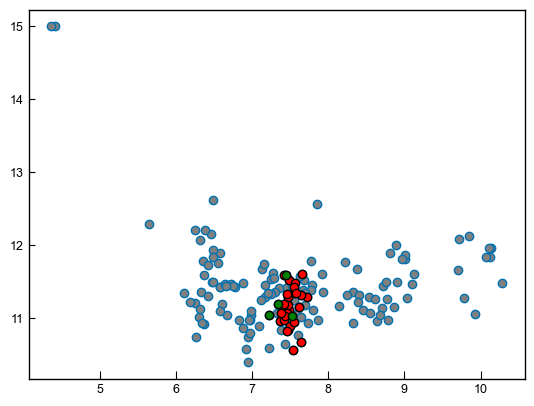

In [12]:
plt.plot(Sides_Glass['MgO'], Sides_Glass['FeO'], 'o', mfc='grey')
plt.plot(Sides_Glass['MgO'].loc[Sides_Glass['Date'].between(2007, 2009)],
          Sides_Glass['FeO'].loc[Sides_Glass['Date'].between(2007, 2009)], 'ok', mfc='red')
plt.plot(Sides_Glass['MgO'].loc[Sides_Glass['Date'].between(2009, 2011)],
          Sides_Glass['FeO'].loc[Sides_Glass['Date'].between(2009, 2011)], 'ok', mfc='green')

In [13]:
## Calculating R2 values

In [14]:
print(np.min(Sides_Glass['FeO'].loc[Sides_Glass['Date'].between(2007, 2012)]))
print(np.max(Sides_Glass['FeO'].loc[Sides_Glass['Date'].between(2007, 2012)]))

10.5649
11.6014


## Sulfur vs. Fo content

In [17]:
type(asymmetric_error)

0      163.381305
1      196.743586
4      222.700679
5      671.104632
6      109.923303
7      170.423836
8      169.902527
9      651.130397
10     794.380564
11     771.749083
12     554.473974
13     194.174975
14     308.855089
15     956.009688
16     572.604974
17     502.953009
18     507.050119
19     274.247705
20     499.699319
21     267.240574
22      78.836977
23     326.633355
24     564.620709
25     352.687131
26     408.705362
27     257.975198
29     274.175283
30    1854.430497
31     446.494288
32     285.907251
33     473.895993
Name: ind_s_eq_melt, dtype: float64

In [18]:
Undegassed_Wieser['S_PEC']=Undegassed_Wieser['Correction factor for PEC correction']*Undegassed_Wieser['S_MI EPMA (ppm)']


C:\Users\penny\AppData\Local\Temp\ipykernel_18012\1057685769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Wieser['S_PEC']=Undegassed_Wieser['Correction factor for PEC correction']*Undegassed_Wieser['S_MI EPMA (ppm)']


(array([8., 9., 8., 3., 2., 0., 0., 0., 0., 1.]),
 array([  78.83697727,  256.39632927,  433.95568127,  611.51503328,
         789.07438528,  966.63373728, 1144.19308928, 1321.75244128,
        1499.31179328, 1676.87114528, 1854.43049728]),
 <BarContainer object of 10 artists>)

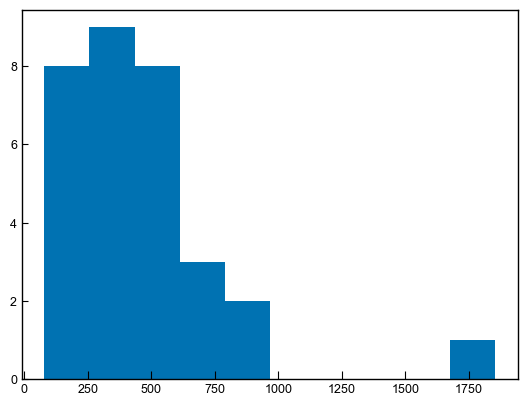

In [109]:
plt.hist(Undegassed_Wieser['ind_s_eq_melt'])

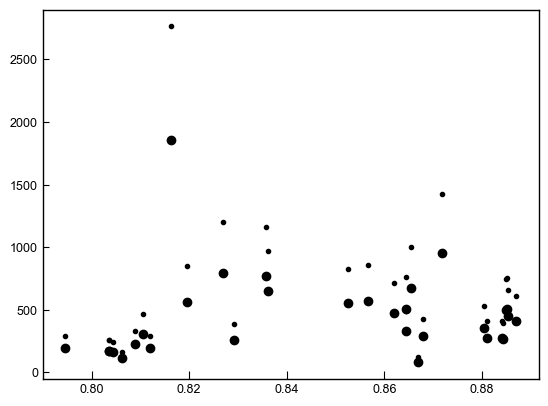

In [113]:
plt.plot(Undegassed_Wieser['Mg# Min'], Undegassed_Wieser['ind_s_eq_melt'], 'ok')
plt.plot(Undegassed_Wieser['Mg# Min'], Undegassed_Wieser['ind_s_eq_melt']+Undegassed_Wieser['std_S_eq_melt'], '.k')

## Just S systematics

In [72]:
s_model=pd.read_excel('S_isotope_Frac.xlsx')
Undegassed_Wieser['S_PEC']=Undegassed_Wieser['Correction factor for PEC correction']*Undegassed_Wieser['S_MI EPMA (ppm)']
# Preferred value
Undegassed_Wieser['S_Sulf_Restored_PEC']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['ind_s_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
Undegassed_Wieser['S_Sulf_Restored_PEC_Upper']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['mean_S_eq_melt']+Undegassed_Wieser['std_S_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
Undegassed_Wieser['S_Sulf_Restored_PEC_Lower']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['mean_S_eq_melt']-Undegassed_Wieser['std_S_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)

Undegassed_Wieser['S_Sulf_Error_up']=Undegassed_Wieser['std_S_eq_melt']
Undegassed_Wieser['S_Sulf_Error_lower']=Undegassed_Wieser['std_S_eq_melt']

# GEt rid of coentrapped
Undegassed_Wieser['S_Sulf_Restored_PEC'].loc[Undegassed_Wieser['S_Sulf_Restored_PEC']>1600]=np.nan

C:\Users\penny\AppData\Local\Temp\ipykernel_18012\2103519853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Wieser['S_PEC']=Undegassed_Wieser['Correction factor for PEC correction']*Undegassed_Wieser['S_MI EPMA (ppm)']
C:\Users\penny\AppData\Local\Temp\ipykernel_18012\2103519853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Wieser['S_Sulf_Restored_PEC']=(Undegassed_Wieser['S_MI EPMA (ppm)']+Undegassed_Wieser['ind_s_eq_melt'])/(1+Undegassed_Wieser['Amount  PEC (%)']/100)
C:\U

In [86]:
Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Lerner['PEC correction coefficient'] = Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')

Has_Sulf_Undegass=Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Undegassed_Lerner['S_Raw_Glass_Meas']

Has_Sulf_Wieser_Undegassed=Undegassed_Wieser['S_Sulf']>0
ms_big=5

C:\Users\penny\AppData\Local\Temp\ipykernel_18012\448972939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
C:\Users\penny\AppData\Local\Temp\ipykernel_18012\448972939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')


## Three high stack

## Two part - mine and ALlans

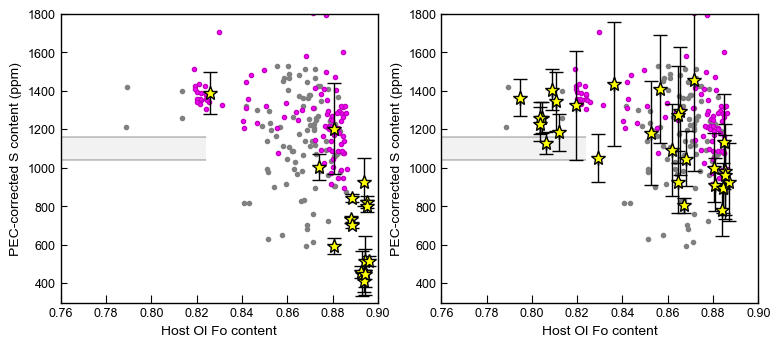

In [105]:

fig, ((ax0, ax6)) = plt.subplots(1,2, figsize = (12*(3/4), 5*(3/4)), sharey=True, sharex=True)


# ax6.plot(Undegassed_Wieser['Mg# Min'].loc[~Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_PEC'].loc[~Has_Sulf_Wieser_Undegassed],
#          'ob', mfc='white', markeredgewidth=1, alpha=1, ms=ms_big)
# ax6.plot(Undegassed_Wieser['Mg# Min'].loc[Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_PEC'].loc[Has_Sulf_Wieser_Undegassed],
#          'sk', mfc='blue', alpha=0.1)

import matplotlib.patches as patches
rect = patches.Rectangle((0.752,1100-60),0.824-0.752,120,linewidth=1,edgecolor='none',facecolor='grey',  alpha=0.1, label='test')
ax0.set_ylim([0, 2000])
# Add the patch to the Axes
ax6.plot([0.752, 0.824], [1100+60, 1100+60], '-k', lw=0.3)
ax6.plot([0.752, 0.824], [1100-60, 1100-60], '-k', lw=0.3)

ax6.errorbar(Undegassed_Wieser['Mg# Min'].loc[Has_Sulf_Wieser_Undegassed],
             Undegassed_Wieser['S_Sulf_Restored_PEC'].loc[Has_Sulf_Wieser_Undegassed],
             xerr=0*Undegassed_Wieser['S_Sulf_Restored_PEC'].loc[Has_Sulf_Wieser_Undegassed], 
             yerr=Undegassed_Wieser['S_Sulf_Error_up'].loc[Has_Sulf_Wieser_Undegassed],
                           fmt='*', ecolor='k', elinewidth=1, capsize=5, mfc='yellow', ms=10, mec='k')

ax6.add_patch(rect)
ax6.set_ylim([0, 2000])
ax6.set_xlim([0.76, 0.9])
## Previous Kilauea Data
ax6.plot(0.01*Sides_MI_Corr['FO_Host'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 
         Sides_MI_Corr['S_PEC'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 'o', mfc='grey', mec='grey', zorder=0, ms=3)
ax6.plot(Ulu_MI['Forsterite'].loc[~Degass_Ulu], Ulu_MI['S_PEC'].loc[~Degass_Ulu], 'om', mfc='magenta', zorder=0, ms=3)

ax6.set_xlabel('Host Ol Fo content')
ax6.set_ylabel('PEC-corrected S content (ppm)')


### ALLANS DATA ##########################################333

x='Host \nMg#'

# ax0.plot(0.01*Undegassed_Lerner[x].loc[~Has_Sulf_Undegass],
#          Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf_Undegass]*Undegassed_Lerner['PEC correction coefficient'].loc[~Has_Sulf_Undegass], 
#          'or', mfc='white',
#          markeredgewidth=1, ms=ms_big)
# ax0.plot(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass], 
#          Undegassed_Lerner['S_Raw_Glass_Meas'].loc[Has_Sulf_Undegass]*Undegassed_Lerner['PEC correction coefficient'].loc[Has_Sulf_Undegass], 'sk', mfc='red', ms=ms_big)

# ax0.plot(0.01*Degassed_Lerner[x], 
#          Degassed_Lerner['S_Raw_Glass_Meas'], 'dr', mfc='white',  ms=4)


ax0.errorbar(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass],
         Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass],
             yerr=Undegassed_Lerner['S (1σ) from sulfide restoration (±1 μm sulfide diameter)'].loc[Has_Sulf_Undegass],
              fmt='*', ecolor='k', elinewidth=1, capsize=5, mfc='yellow', ms=10, mec='k')

rect = patches.Rectangle((0.752,1100-60),0.824-0.752,120,linewidth=1,edgecolor='none',facecolor='grey',  alpha=0.1, label='test')
ax0.plot([0.752, 0.824], [1100+60, 1100+60], '-k', lw=0.3)
ax0.plot([0.752, 0.824], [1100-60, 1100-60], '-k', lw=0.3)

ax0.plot(0.01*Sides_MI_Corr['FO_Host'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 
         Sides_MI_Corr['S_PEC'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 'o', mfc='grey', mec='grey', zorder=0, ms=3)
ax0.plot(Ulu_MI['Forsterite'].loc[~Degass_Ulu], Ulu_MI['S_PEC'].loc[~Degass_Ulu], 'om', mfc='magenta', zorder=0, ms=3)
ax0.add_patch(rect)
ax6.yaxis.set_tick_params(which='both', labelbottom=True)
ax0.set_ylabel('PEC-corrected S content (ppm)')
ax0.set_xlabel('Host Ol Fo content')

ax6.set_ylim([300, 1800])
fig.savefig('Allan_vs_My_Sulfur_Data.png', dpi=300)

KstestResult(statistic=0.25161290322580643, pvalue=0.08408115513747731)
KstestResult(statistic=0.10161290322580645, pvalue=0.9405621105237865)


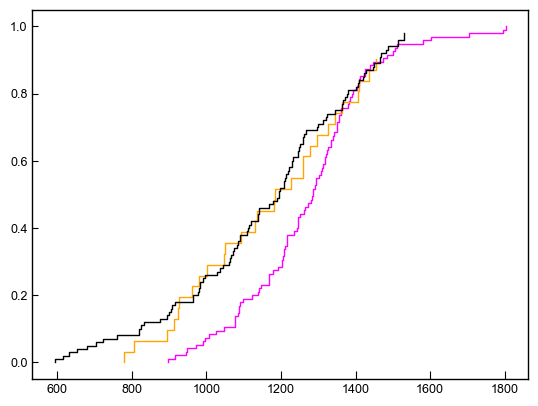

In [78]:
XUlu_sorted=np.sort(Ulu_MI['S_PEC'].loc[~Degass_Ulu])
b=1
plt.step(np.concatenate([XUlu_sorted, XUlu_sorted[[-1]]]),
         np.arange(XUlu_sorted.size+1)/XUlu_sorted.size, color='magenta', linewidth=b)


XW2018_sorted=np.sort(Undegassed_Wieser['S_Sulf_Restored_PEC'].loc[Has_Sulf_Wieser_Undegassed])
 
plt.step(np.concatenate([XW2018_sorted, XW2018_sorted[[-1]]]),
         np.arange(XW2018_sorted.size+1)/XW2018_sorted.size, color='orange', linewidth=b)


S2014_sorted=np.sort(Sides_MI_Corr['S_PEC'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides])
 
plt.step(np.concatenate([S2014_sorted, S2014_sorted[[-1]]]),
         np.arange(S2014_sorted.size+1)/S2014_sorted.size, color='black', linewidth=b)
from scipy import stats
test_M_L=stats.ks_2samp(XUlu_sorted, XW2018_sorted)
print(test_M_L)

test_M_L=stats.ks_2samp(S2014_sorted, XW2018_sorted)
print(test_M_L)

## K2O - TiO2

In [32]:
Undegassed_Wieser.columns[Undegassed_Wieser.columns.str.contains('Sat')]

Index(['SaturationP_bars_VESIcal'], dtype='object')

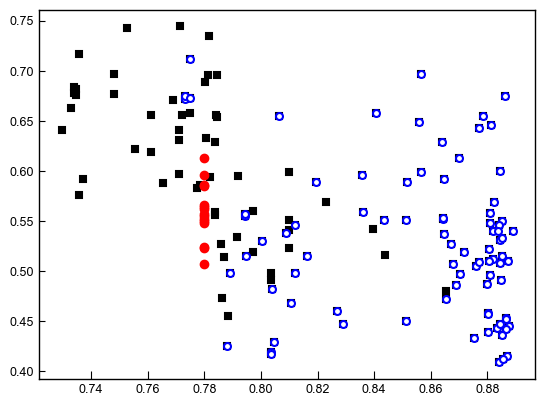

In [33]:

plt.plot(All2018_MI['Mg# Min'], 
         All2018_MI['Nb_ppm_m93 LAICPMS']/All2018_MI['Y_ppm_m89 LAICPMS'],
         'sk', mfc='black', markeredgewidth=1.5, alpha=1, ms=ms_big)


plt.plot(Undegassed_Wieser['Mg# Min'], 
         Undegassed_Wieser['Nb_ppm_m93 LAICPMS']/Undegassed_Wieser['Y_ppm_m89 LAICPMS'],
         'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)


plt.plot(F8_MG['Nb_ppm_m93 LAICPMS']*0+0.78, 
         F8_MG['Nb_ppm_m93 LAICPMS']/F8_MG['Y_ppm_m89 LAICPMS'],
         'or')

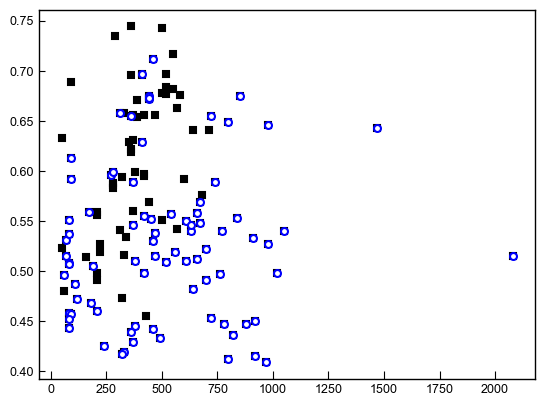

In [34]:

plt.plot(All2018_MI['SaturationP_bars_VESIcal'], 
         All2018_MI['Nb_ppm_m93 LAICPMS']/All2018_MI['Y_ppm_m89 LAICPMS'],
         'sk', mfc='black', markeredgewidth=1.5, alpha=1, ms=ms_big)


plt.plot(Undegassed_Wieser['SaturationP_bars_VESIcal'], 
         Undegassed_Wieser['Nb_ppm_m93 LAICPMS']/Undegassed_Wieser['Y_ppm_m89 LAICPMS'],
         'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)


In [35]:
Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf_Undegass]

0      868.732560
1      804.714638
2     1048.849425
3     1303.843770
4      567.892980
6     1251.971010
9      949.789755
10     853.337340
11     829.403460
14     922.475655
15     820.031760
16     918.054135
17     956.225790
19     501.806475
20     492.891345
21     462.737700
22     694.631205
23     482.706630
28     888.801615
29     782.865360
30     765.924210
31     439.260000
36    1128.040000
37    1151.750000
38    1166.650000
39    1177.450000
42    1221.750000
50     800.360000
51     762.750000
52     901.150000
53     604.960000
54     733.425000
55     706.930000
63     566.450000
Name: S_Raw_Glass_Meas, dtype: float64

## Other things to add to the dataframe

In [83]:
Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Lerner['PEC correction coefficient'] = Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')

Obs=(Undegassed_Lerner['Chance_for_Obs']=="Yes")
Obs_Degass=(Degassed_Lerner['Chance_for_Obs']=="Yes")

Has_Sulf_Undegass=Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Undegassed_Lerner['S_Raw_Glass_Meas']


C:\Users\penny\AppData\Local\Temp\ipykernel_18012\1937559749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
C:\Users\penny\AppData\Local\Temp\ipykernel_18012\1937559749.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')


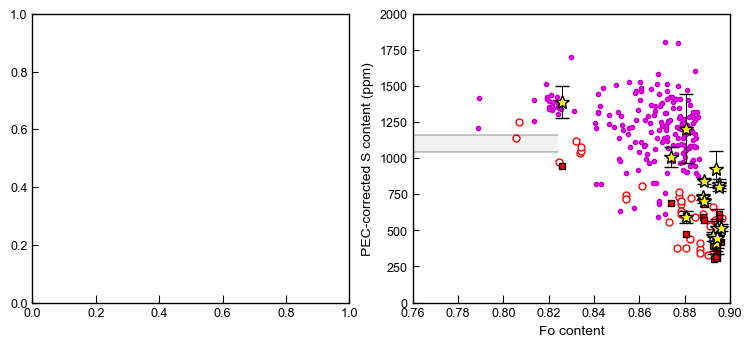

In [84]:
fig, ((ax6, ax0)) = plt.subplots(1,2, figsize = (12*(3/4), 5*(3/4)))


x='Host \nMg#'

ax0.plot(0.01*Undegassed_Lerner[x].loc[~Has_Sulf_Undegass],
         Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf_Undegass]*Undegassed_Lerner['PEC correction coefficient'].loc[~Has_Sulf_Undegass], 
         'or', mfc='white',
         markeredgewidth=1, ms=ms_big)
ax0.plot(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass], 
         Undegassed_Lerner['S_Raw_Glass_Meas'].loc[Has_Sulf_Undegass]*Undegassed_Lerner['PEC correction coefficient'].loc[Has_Sulf_Undegass], 'sk', mfc='red', ms=ms_big)

# ax0.plot(0.01*Degassed_Lerner[x], 
#          Degassed_Lerner['S_Raw_Glass_Meas'], 'dr', mfc='white',  ms=4)


ax0.errorbar(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass],
         Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass],
             yerr=Undegassed_Lerner['S (1σ) from sulfide restoration (±1 μm sulfide diameter)'].loc[Has_Sulf_Undegass],
              fmt='*', ecolor='black', elinewidth=0.7, capsize=5, mfc='yellow', ms=10, mec='k')

rect = patches.Rectangle((0.752,1100-60),0.824-0.752,120,linewidth=1,edgecolor='none',facecolor='grey',  alpha=0.1, label='test')
ax0.plot([0.752, 0.824], [1100+60, 1100+60], '-k', lw=0.3)
ax0.plot([0.752, 0.824], [1100-60, 1100-60], '-k', lw=0.3)

ax0.plot(0.01*Sides_MI_Corr['FO_Host'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 
         Sides_MI_Corr['S_PEC'].loc[~Sides_MI_Corr['Date'].between(2007, 2012)  & ~Degass_Sides], 'om', mfc='magenta', zorder=0, ms=3)
ax0.plot(Ulu_MI['Forsterite'].loc[~Degass_Ulu], Ulu_MI['S_PEC'].loc[~Degass_Ulu], 'om', mfc='magenta', zorder=0, ms=3)




Obs_Degass

# ax0.plot(0.01*Undegassed_Lerner[x].loc[~Has_Sulf_Undegass&Obs],
#          Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf_Undegass&Obs]*Undegassed_Lerner['PEC correction coefficient'].loc[~Has_Sulf_Undegass&Obs], 
#          'pk', mfc='cyan',
#          markeredgewidth=1, ms=ms_big)
# ax0.plot(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass&Obs], 
#          Undegassed_Lerner['S_Raw_Glass_Meas'].loc[Has_Sulf_Undegass&Obs]*Undegassed_Lerner['PEC correction coefficient'].loc[Has_Sulf_Undegass&Obs],
#         'pk', mfc='cyan', ms=ms_big)

# ax0.plot(0.01*Degassed_Lerner[x].loc[Obs_Degass], 
#          Degassed_Lerner['S_Raw_Glass_Meas'].loc[Obs_Degass], 'pk', mfc='cyan',  ms=4)



ax0.add_patch(rect)
ax0.set_ylim([0, 2000])
ax0.set_xlim([0.76, 0.9])
ax0.set_ylabel('PEC-corrected S content (ppm)')
ax0.set_xlabel('Fo content')
fig.savefig('Allan_vs_My_Sulfur_Data2.png', dpi=300)

<ErrorbarContainer object of 3 artists>

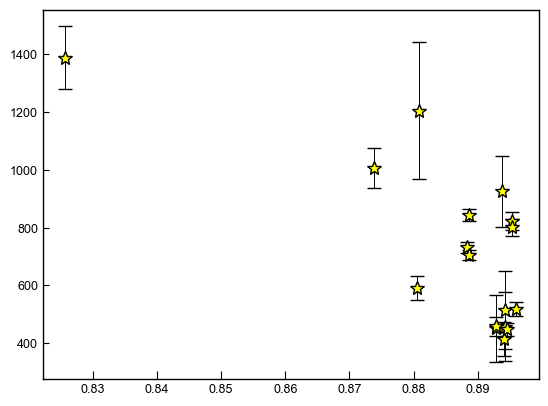

In [38]:
plt.errorbar(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass],
         Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass],
             yerr=Undegassed_Lerner['S (1σ) from sulfide restoration (±1 μm sulfide diameter)'].loc[Has_Sulf_Undegass],
              fmt='*', ecolor='black', elinewidth=0.7, capsize=5, mfc='yellow', ms=10, mec='k')


(array([4., 0., 3., 0., 1., 1., 0., 0., 0., 1.]),
 array([0.40161301, 1.09141089, 1.78120876, 2.47100664, 3.16080452,
        3.85060239, 4.54040027, 5.23019815, 5.91999602, 6.6097939 ,
        7.29959177]),
 <BarContainer object of 10 artists>)

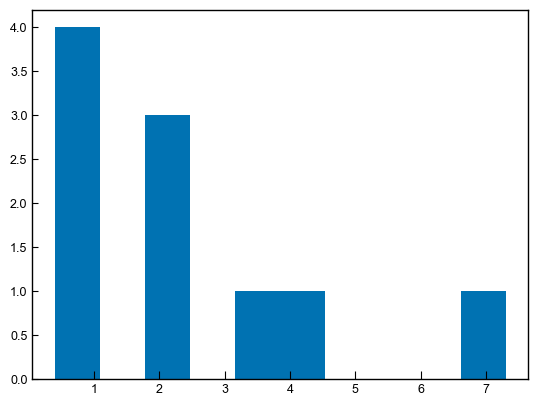

In [107]:
plt.hist(Undegassed_Lerner['Saturation depth (km) (Ryan 1987 parameterization)'].loc[Has_Sulf_Undegass])

In [39]:
len(Undegassed_Lerner[x].loc[Has_Sulf_Undegass])

17

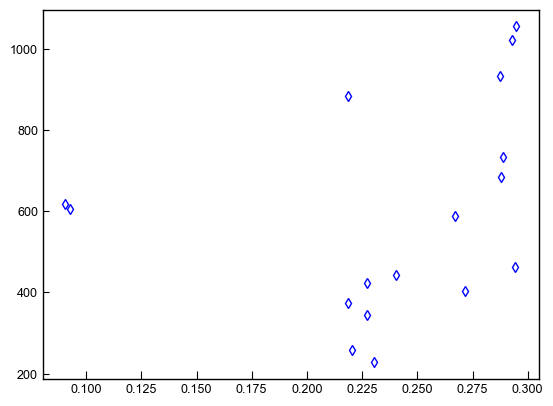

In [40]:
# plt.plot(Undegassed_Wieser['H2O_MI SIMS'].loc[~Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_MI EPMA (ppm)'].loc[~Has_Sulf_Wieser_Undegassed],
#          'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)
# plt.plot(Undegassed_Wieser['H2O_MI SIMS'].loc[Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_MI EPMA (ppm)'].loc[Has_Sulf_Wieser_Undegassed],
#          'sk', mfc='blue', alpha=1, ms=ms_big)
plt.plot(Degassed_Wieser['H2O_MI SIMS'], Degassed_Wieser['S_MI EPMA (ppm)'],
         'db', mfc='white', alpha=1, ms=ms_big)

In [41]:
sum((Undegassed_Lerner['Chance_for_Obs']=="No") & (Undegassed_Lerner['S_Sulf']>0))

4

In [42]:
Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']
Degassed_Lerner['Corr_S']=Degassed_Lerner['S_Raw_Glass_Meas']*Degassed_Lerner['PEC correction coefficient']
Lerner['Corr_S']=Lerner['S_Raw_Glass_Meas']*Lerner['PEC correction coefficient']


C:\Users\penny\AppData\Local\Temp\ipykernel_7668\4000938303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']
C:\Users\penny\AppData\Local\Temp\ipykernel_7668\4000938303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degassed_Lerner['Corr_S']=Degassed_Lerner['S_Raw_Glass_Meas']*Degassed_Lerner['PEC correction coefficient']


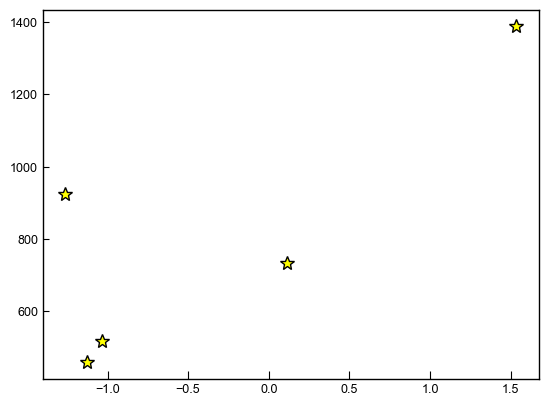

In [56]:
plt.plot(Undegassed_Lerner['δ34S'].loc[Has_Sulf_Undegass], 
         Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass], 
         '*k', mfc='yellow',  ms=10)

PEC Corr= 1/(1+PEC)

C:\Users\penny\AppData\Local\Temp\ipykernel_7668\2151985191.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']


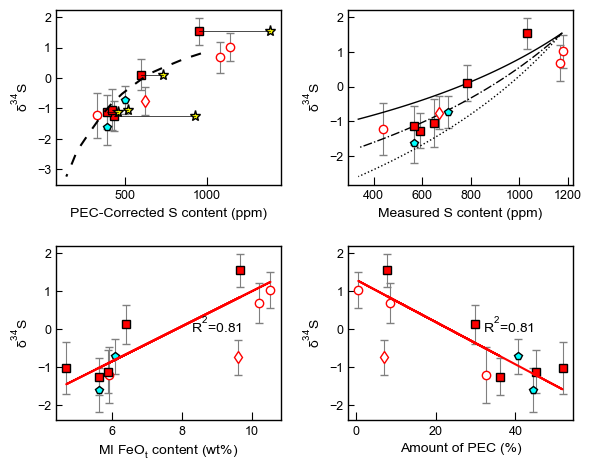

In [61]:

fig, ((ax1, ax4), (ax3, ax2)) = plt.subplots(2,2, figsize = (10*(2/3),8*(2/3)))
Has_Sulf_Wieser_Undegassed=Undegassed_Wieser['S_Sulf']>0
ms_big=5

## Errorbars on measurements

ax2.errorbar(Lerner['PEC_Equivalent'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax1.errorbar(Lerner['Corr_S'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax3.errorbar(Lerner['FeOT wt%_Raw'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax4.errorbar(Lerner['S_Raw_Glass_Meas'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)


########################## PEC vs. AMONT OF s

import matplotlib.patches as patches
rect = patches.Rectangle((0.752,1100-60),0.824-0.752,120,linewidth=1,edgecolor='none',facecolor='grey',  alpha=0.1, label='test')
ax0.set_ylim([0, 2000])



ax0.plot(Undegassed_Wieser['Amount  PEC (%)'].loc[~Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_MI EPMA (ppm)'].loc[~Has_Sulf_Wieser_Undegassed],
         'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)
ax0.plot(Undegassed_Wieser['Amount  PEC (%)'].loc[Has_Sulf_Wieser_Undegassed], Undegassed_Wieser['S_MI EPMA (ppm)'].loc[Has_Sulf_Wieser_Undegassed],
         'sk', mfc='blue', alpha=1, ms=ms_big)
ax0.plot(Degassed_Wieser['Amount  PEC (%)'], Degassed_Wieser['S_MI EPMA (ppm)'],
         'db', mfc='white', alpha=1, ms=ms_big)
ax0.plot(Undegassed_Lerner['PEC_Equivalent'].loc[~Has_Sulf_Undegass & Obs], 
         Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1, ms=ms_big)
ax0.plot(Undegassed_Lerner['PEC_Equivalent'].loc[Has_Sulf_Undegass & Obs], 
         Undegassed_Lerner['S_Raw_Glass_Meas'].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red', ms=ms_big)
ax0.plot(Undegassed_Lerner['PEC_Equivalent'].loc[~Obs], 
         Undegassed_Lerner['S_Raw_Glass_Meas'].loc[~Obs], 'pk', mfc='cyan')
ax0.plot(Degassed_Lerner['PEC_Equivalent'], Degassed_Lerner['S_Raw_Glass_Meas'], 'dr', mfc='white',  ms=4)
ax0.plot(Undegassed_Lerner['PEC_Equivalent'].loc[Has_Sulf_Undegass], 
         Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass], 
         '*k', mfc='yellow',  ms=4)


# ax0.errorbar(0.01*Undegassed_Lerner[x].loc[Has_Sulf_Undegass],
#          Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass],
#              yerr=Undegassed_Lerner['S (1σ) from sulfide restoration (±1 μm sulfide diameter)'].loc[Has_Sulf_Undegass],
#               fmt='*', ecolor='black', elinewidth=0.7, capsize=5, mfc='yellow', ms=10, mec='k')


ax0.set_xlabel('Amount of PEC (%)')
ax0.set_ylabel('Measured S content (ppm)')





# Plot S vs. 𝛿34S
x='δ34S'
y='Corr_S'
ax1.plot(Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax1.plot(Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax1.plot(Undegassed_Lerner[y].loc[~Obs], Undegassed_Lerner[x].loc[~Obs], 'pk', mfc='cyan')
ax1.plot(Degassed_Lerner[y], Degassed_Lerner[x], 'dr', mfc='white')
ax1.plot( S_degass, 𝛿34S_degass, '--k', dashes=(5, 5))

ax1.plot(Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass], 
         Undegassed_Lerner[x].loc[Has_Sulf_Undegass], 
         '*k', mfc='yellow',  ms=8)
ax1.plot([Undegassed_Lerner[y].loc[Has_Sulf_Undegass], Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass]], 
         [Undegassed_Lerner[x].loc[Has_Sulf_Undegass], Undegassed_Lerner[x].loc[Has_Sulf_Undegass]],
         '-k', lw=0.5)

ax1.set_xlabel('PEC-Corrected S content (ppm)')
ax1.set_ylabel('δ$^{34}$S')

## Then plot of 𝛿34S vs. FeO

y='δ34S'
Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']
x='PEC_Equivalent'
ax2.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
ax2.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax2.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax2.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')



# Calculate R2
x_vals=Undegassed_Lerner[x]
y_vals= Undegassed_Lerner[y]

stats_PEC_𝛿34S=pt.calculate_R2(x_vals, y_vals)
stats_PEC_𝛿34S['R2']

ax2.annotate("R$^{2}$="+str(stats_PEC_𝛿34S['R2']), xy=(0.6, 0.5), xycoords="axes fraction", fontsize=10)
ax2.plot(stats_PEC_𝛿34S['x_pred'], stats_PEC_𝛿34S['y_pred'], '-r')
ax2.set_ylabel('δ$^{34}$S')
ax2.set_xlabel('Amount of PEC (%)')

y='δ34S'
x='FeOT wt%_Raw'
ax3.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
ax3.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax3.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax3.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')


# Calculate R2
x_vals=Undegassed_Lerner[x]
y_vals= Undegassed_Lerner[y]

stats_PEC_FeO=pt.calculate_R2(x_vals, y_vals)
stats_PEC_FeO['R2']

ax3.annotate("R$^{2}$="+str(stats_PEC_𝛿34S['R2']), xy=(0.6, 0.5), xycoords="axes fraction", fontsize=10)
ax3.plot(stats_PEC_FeO['x_pred'], stats_PEC_FeO['y_pred'], '-r')
ax3.set_ylabel('δ$^{34}$S')
ax3.set_xlabel('MI FeO$_{t}$ content (wt%)')

## Loading S isotope frac modle



x='δ34S'
y='S_Raw_Glass_Meas'
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha997'], '-k', lw=1)
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha996'], '-.k', lw=1)
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha995'], ':k', lw=1)
ax4.plot(Degassed_Lerner[y], Degassed_Lerner[x], 'dr', mfc='white')

ax4.plot(Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax4.plot(Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax4.plot(Undegassed_Lerner[y].loc[~Obs], Undegassed_Lerner[x].loc[~Obs], 'pk', mfc='cyan')

ax4.set_xlabel('Measured S content (ppm)')
ax4.set_ylabel('δ$^{34}$S')
    

plt.subplots_adjust(wspace=0.3, hspace=0.35) 

fig.savefig('Allan_vs_My_Sulfur_Data.png', dpi=300)

C:\Users\penny\AppData\Local\Temp\ipykernel_14228\1787832214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']


<ErrorbarContainer object of 3 artists>

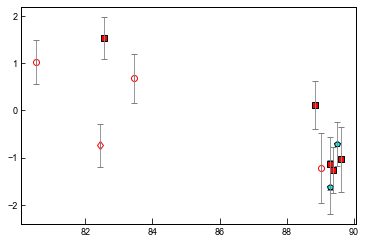

In [41]:
y='δ34S'
Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']
x='Host \nMg#'
plt.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
plt.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
plt.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
plt.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')

plt.errorbar(Lerner[x], Lerner[y], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)



## Mixing model

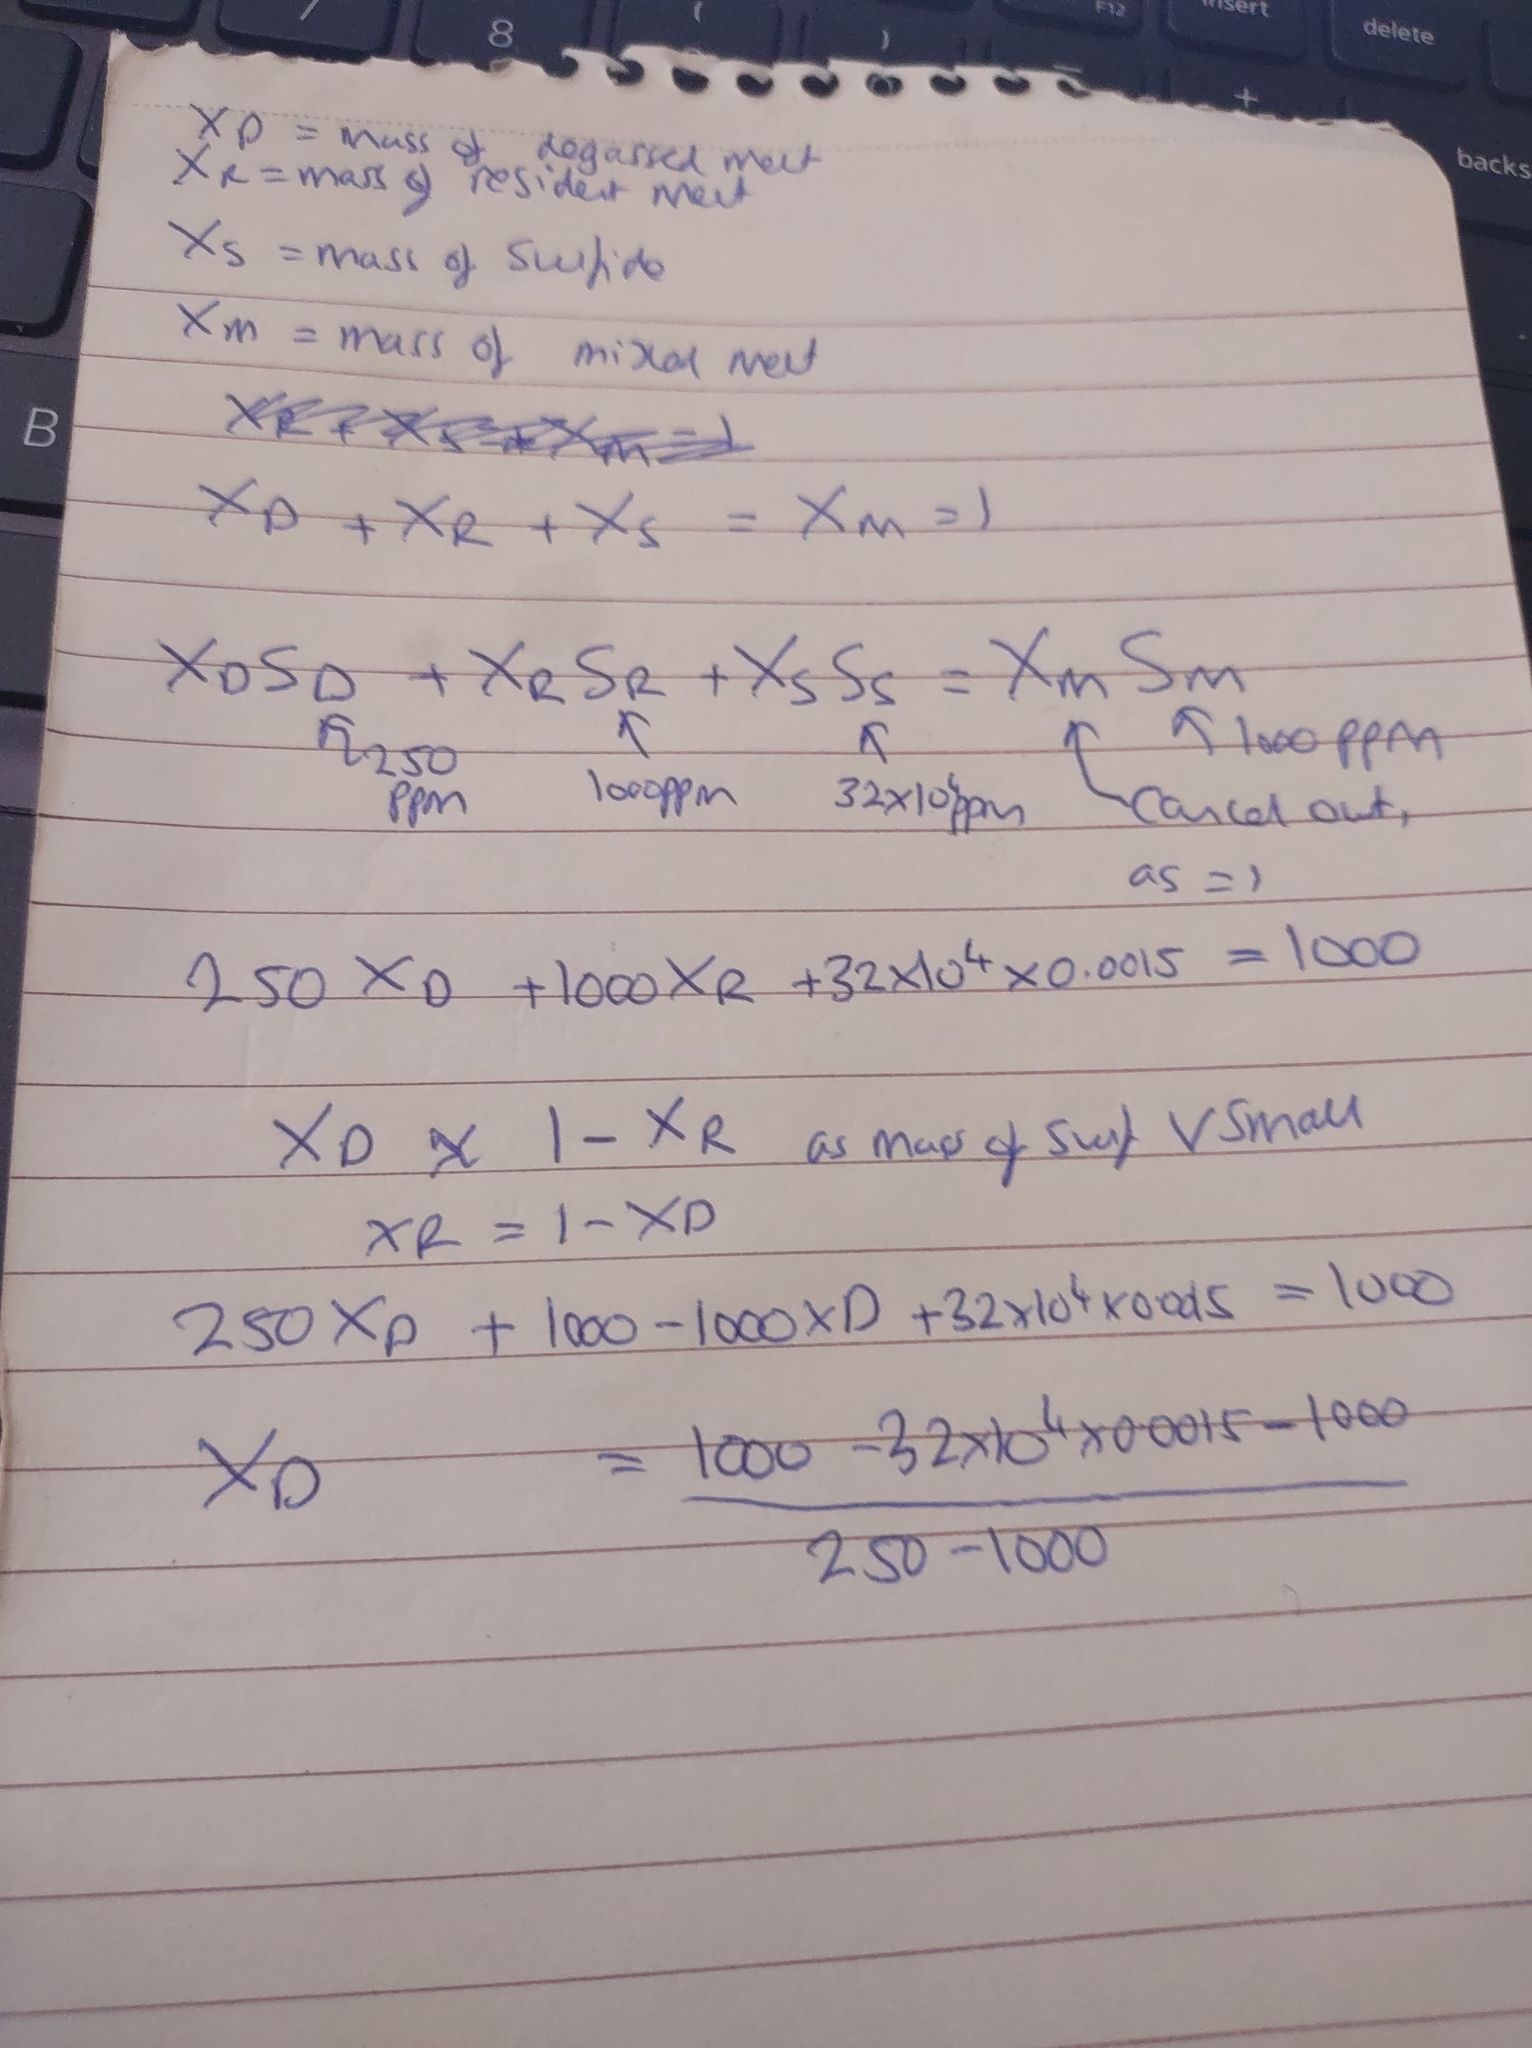

## Mixing model if not sulfide saturated

In [44]:
X_D=np.linspace(0, 1, 100)
S_Mix_250=1600*(1-X_D)+250*X_D
S_Mix_350=1600*(1-X_D)+350*X_D
S_Mix_450=1600*(1-X_D)+450*X_D
S_Mix_550=1600*(1-X_D)+550*X_D


In [45]:
High_Fo_ones=Undegassed_Lerner['Host \nMg#']>88

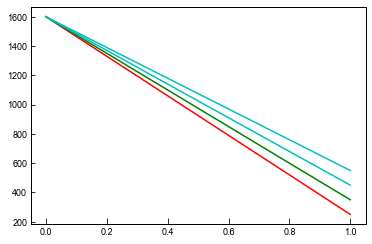

In [48]:
MgO_Mix=35*(1-X_D)+6*X_D
plt.plot(X_D,  S_Mix_250,  '-r')
plt.plot(X_D, S_Mix_350,  '-g')
plt.plot(X_D, S_Mix_450,  '-c')
plt.plot(X_D, S_Mix_550,  '-c')
plt.plot([0, 1], [np.min(

In [85]:
Undegassed_Lerner.columns

Index(['Analysis Name', 'Fe3FeT_Thesis', 'S6ST_Thesis', 'Fissure\n#',
       'Sample\nName', 'Eruption\nDate', 'Days since eruption start',
       'Distance traveled before quench (km)', 'Glass Type', 'Host mineral',
       'Melt inclusion length', 'Melt inclusion width',
       'vapor bubble volume (%)', 'Sulfide diameter if present in MI',
       'Sulfide Diameter', 'Chance_for_Obs', 'Host \nAn#', 'Host \nMg#',
       'Fo equilibrium olivine (assume Kd=0.32, xFeO / ΣxFe =0.82)',
       'SiO2 wt%_PEC', 'SiO2 (1SE)', 'TiO2 wt%_PEC', 'TiO2 (1SE)',
       'Al2O3  wt%_PEC', 'Al2O3 (1SE)', 'FeOT wt%_PEC', 'FeOT (1SE)',
       'MgO wt%_PEC', 'MgO (1SE)', 'MnO wt%_PEC', 'MnO (1SE)', 'CaO wt%_PEC',
       'CaO (1SE)', 'Na2O wt%_PEC', 'Na2O (1SE)', 'K2O wt%_PEC', 'K2O (1SE)',
       'P2O5 wt%_PEC', 'P2O5 (1SE)', 'Cl ppm_PEC', 'Cl\n(1SE)',
       'S ppm (with sulfide restored, if applicable)_PEC',
       'S (1SE) from glass EPMA analysis',
       'S (1σ) from sulfide restoration (±1 μm sulfide 

In [94]:
np.nanmean(Undegassed_Lerner['Corr_S'].loc[High_Fo_ones])

481.77201326366674

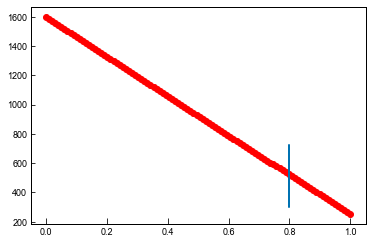

In [80]:
plt.plot(X_D, S_Mix, 'or')
plt.plot(0*Undegassed_Lerner['Corr_S'].loc[High_Fo_ones]+0.8, Undegassed_Lerner['Corr_S'].loc[High_Fo_ones])

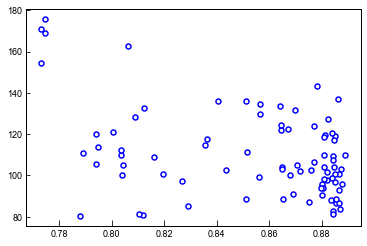

In [93]:
plt.plot(Undegassed_Wieser['Mg# Min'], 
         Undegassed_Wieser['Ba_ppm_m137 LAICPMS'],
         'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)



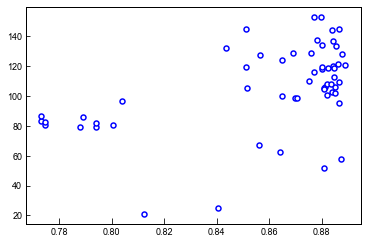

In [82]:
plt.plot(Undegassed_Wieser['Mg# Min'].loc[~Has_Sulf_Wieser_Undegassed], 
         Undegassed_Wieser['Ni_ppm_m60 LAICPMS'].loc[~Has_Sulf_Wieser_Undegassed],
         'ob', mfc='white', markeredgewidth=1.5, alpha=1, ms=ms_big)



In [74]:
(-0.0015*(32*10**4))/(250-1000)

0.64

In [67]:
Undegassed_Lerner.columns

Index(['Analysis Name', 'Fe3FeT_Thesis', 'S6ST_Thesis', 'Fissure\n#',
       'Sample\nName', 'Eruption\nDate', 'Days since eruption start',
       'Distance traveled before quench (km)', 'Glass Type', 'Host mineral',
       'Melt inclusion length', 'Melt inclusion width',
       'vapor bubble volume (%)', 'Sulfide diameter if present in MI',
       'Sulfide Diameter', 'Chance_for_Obs', 'Host \nAn#', 'Host \nMg#',
       'Fo equilibrium olivine (assume Kd=0.32, xFeO / ΣxFe =0.82)',
       'SiO2 wt%_PEC', 'SiO2 (1SE)', 'TiO2 wt%_PEC', 'TiO2 (1SE)',
       'Al2O3  wt%_PEC', 'Al2O3 (1SE)', 'FeOT wt%_PEC', 'FeOT (1SE)',
       'MgO wt%_PEC', 'MgO (1SE)', 'MnO wt%_PEC', 'MnO (1SE)', 'CaO wt%_PEC',
       'CaO (1SE)', 'Na2O wt%_PEC', 'Na2O (1SE)', 'K2O wt%_PEC', 'K2O (1SE)',
       'P2O5 wt%_PEC', 'P2O5 (1SE)', 'Cl ppm_PEC', 'Cl\n(1SE)',
       'S ppm (with sulfide restored, if applicable)_PEC',
       'S (1SE) from glass EPMA analysis',
       'S (1σ) from sulfide restoration (±1 μm sulfide 

C:\Users\penny\AppData\Local\Temp\ipykernel_28908\2856215699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']


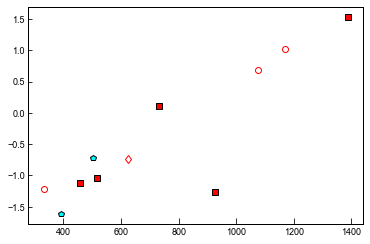

In [63]:


y='δ34S'
Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']
x='S ppm (with sulfide restored, if applicable)_PEC'
plt.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
plt.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
plt.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
plt.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')


In [43]:
Undegassed_Lerner_has_S_isotopes=Undegassed_Lerner['δ34S']>-10
degassed_Lerner_has_S_isotopes=Degassed_Lerner['δ34S']>-10
print('How many undegassed had s isotopes')
print(len(Undegassed_Lerner.loc[Undegassed_Lerner_has_S_isotopes]))
print('How many degassed had s isotopes')
print(len(Degassed_Lerner.loc[degassed_Lerner_has_S_isotopes]))
print('How many undegassed had a chance for sulfide observation')
print(len(Undegassed_Lerner.loc[Undegassed_Lerner_has_S_isotopes & (Undegassed_Lerner['Chance_for_Obs']=="Yes")]))
print('How many of these actually had a sulfide')
print(len(Undegassed_Lerner.loc[Undegassed_Lerner_has_S_isotopes & (Undegassed_Lerner['Chance_for_Obs']=="Yes") & (Undegassed_Lerner['Sulfide Diameter']>0)]))

How many undegassed had s isotopes
10
How many degassed had s isotopes
1
How many undegassed had a chance for sulfide observation
8
How many of these actually had a sulfide
5


In [44]:
print('How many of these actually had a sulfide')
print(len(Undegassed_Lerner.loc[Undegassed_Lerner_has_S_isotopes & (Undegassed_Lerner['Chance_for_Obs']=="Yes") & (Undegassed_Lerner['Sulfide Diameter']>0)]))

How many of these actually had a sulfide
5


In [45]:
Undegassed_Lerner.loc[Undegassed_Lerner_has_S_isotopes]

df_interest=pd.DataFrame(data={'Chance_for_Obs': Undegassed_Lerner['Chance_for_Obs'].loc[Undegassed_Lerner_has_S_isotopes],
                               'PEC': Undegassed_Lerner['PEC correction coefficient'].loc[Undegassed_Lerner_has_S_isotopes],
                               'S': Undegassed_Lerner['Corr_S'].loc[Undegassed_Lerner_has_S_isotopes],
                              'S Sulfide': Undegassed_Lerner[ 'Sulfide Diameter'].loc[Undegassed_Lerner_has_S_isotopes]})
df_interest                   

,Chance_for_Obs,PEC,S,S Sulfide
31,Yes,0.7460,327.687960,NaN
32,Yes,0.9190,949.069680,6.0
34,Yes,0.7600,595.558800,10.0
35,Yes,0.7310,430.405490,6.0
38,Yes,0.9230,1076.817950,NaN
39,Yes,0.9700,1142.126500,NaN
55,No,0.7015,495.911395,NaN
59,Yes,0.6870,389.508390,3.2
61,Yes,0.6500,421.889000,5.4
63,No,0.6825,386.602125,NaN


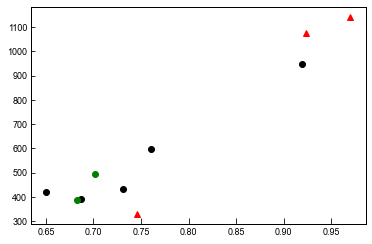

In [46]:
plt.plot(df_interest['PEC'].loc[(df_interest['S Sulfide']>0)& (df_interest['Chance_for_Obs']=="Yes")], 
         df_interest['S'].loc[df_interest['S Sulfide']>0& (df_interest['Chance_for_Obs']=="Yes")], 'ok', label='Has measurable sulfide')
plt.plot(df_interest['PEC'].loc[~(df_interest['S Sulfide']>0)& (df_interest['Chance_for_Obs']=="Yes")], 
         df_interest['S'].loc[~(df_interest['S Sulfide']>0)& (df_interest['Chance_for_Obs']=="Yes")], '^r', label='no sulf')
plt.plot(df_interest['PEC'].loc[(df_interest['Chance_for_Obs']=="No")], 
         df_interest['S'].loc[(df_interest['Chance_for_Obs']=="No")], 'og', label='No chance for observation')

## Sulfur isotope balance
- d34 melt * [C]melt * [X]melt + 𝛿34Sulf * [C]sulf * [X]sulf + Ol (cancels except for X) = 𝛿34S i *[C]i * [X]i
- Lets say Xi is 1 to simply the problem
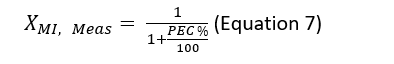

In [115]:
# What is the initial S content and S isotope ratio
print('initial S content')
init_S=np.max(stats_𝛿34S['y_pred'])
print(np.max(stats_𝛿34S['y_pred']))
init_34dS=np.max(stats_𝛿34S['x_pred'])
print('Initial S isotope ratio')
print(np.max(stats_𝛿34S['x_pred']))

initial S content
1185.235222765932
Initial S isotope ratio
1.5350906196098801


In [116]:
# What is the final S content and S isotope ratio
print('Final S content')
Final_S=np.min(stats_𝛿34S['y_pred'])
print(np.min(stats_𝛿34S['y_pred']))
Final_34dS=np.min(stats_𝛿34S['x_pred'])
print('Final S isotope ratio')
print(np.min(stats_𝛿34S['x_pred']))

Final S content
491.1474414449055
Final S isotope ratio
-1.6218363799791469


In [120]:
## Amoutn of PEC
max_PEC=np.max(stats_PEC_𝛿34S['x_pred'])
XMelt_left=1/(1+(max_PEC/100))
XMelt_left

0.6589144959793738

In [123]:
np.min(Undegassed_Lerner['PEC correction coefficient'])

0.65

In [141]:
## Mass of sulfide needed 
# X_sulf * S_sulf + X_Ol*S_Ol + X_MI*S_MI=S_init
S_Sulf=32*10**4
X_Sulf=(init_S-(XMelt_left*Final_S))/S_Sulf

In [142]:
Final_S

491.1474414449055

In [143]:
𝛿34S_Sulf=((init_34dS*init_S)-(Final_34dS*Final_S*XMelt_left))/(X_Sulf*S_Sulf)
𝛿34S_Sulf

2.7208436013494692

In [144]:
init_S*init_34dS

1819.4434724992086

In [145]:
Final_34dS*Final_S*XMelt_left

-524.8654504510006

In [146]:
X_Sulf*S_Sulf*𝛿34S_Sulf

2344.3089229502093

In [147]:
(Final_34dS*Final_S*XMelt_left)+(X_Sulf*S_Sulf*𝛿34S_Sulf)

1819.4434724992088

In [132]:
# Frac factor
Delta_34S=𝛿34S_Sulf-Final_34dS
Delta_34S

4.342679981328616

In [149]:
Final_3432S=((Final_34dS/1000)+1)*-0.3
Final_3432S

-0.29951344908600624

In [151]:
Melt_3432S=((Final_34dS/1000)+1)*-0.3
Sulf_3432S=((𝛿34S_Sulf/1000)+1)*-0.3
alpha=Melt_3432S/Sulf_3432S
alpha

0.9956691037101298